In [8]:
!pip install pandas
import pandas as pd
import numpy as np
!pip install matplotlib
filename='C:/Users/2376234/Desktop/data/cities.json'
df=pd.read_json(filename)
df


Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 10.6/10.6 MB 36.3 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 30.8 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 20.7 MB/s eta 0:00:00
     --------------------------------------- 15.0/15.0 MB 38.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.5.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
...,...,...,...,...,...,...,...
995,Weslaco,28.8%,26.159519,-97.990837,37093,996,Texas
996,Keizer,14.4%,44.990119,-123.026208,37064,997,Oregon
997,Spanish Fork,78.1%,40.114955,-111.654923,36956,998,Utah
998,Beloit,2.9%,42.508348,-89.031776,36888,999,Wisconsin


<Axes: xlabel='state'>

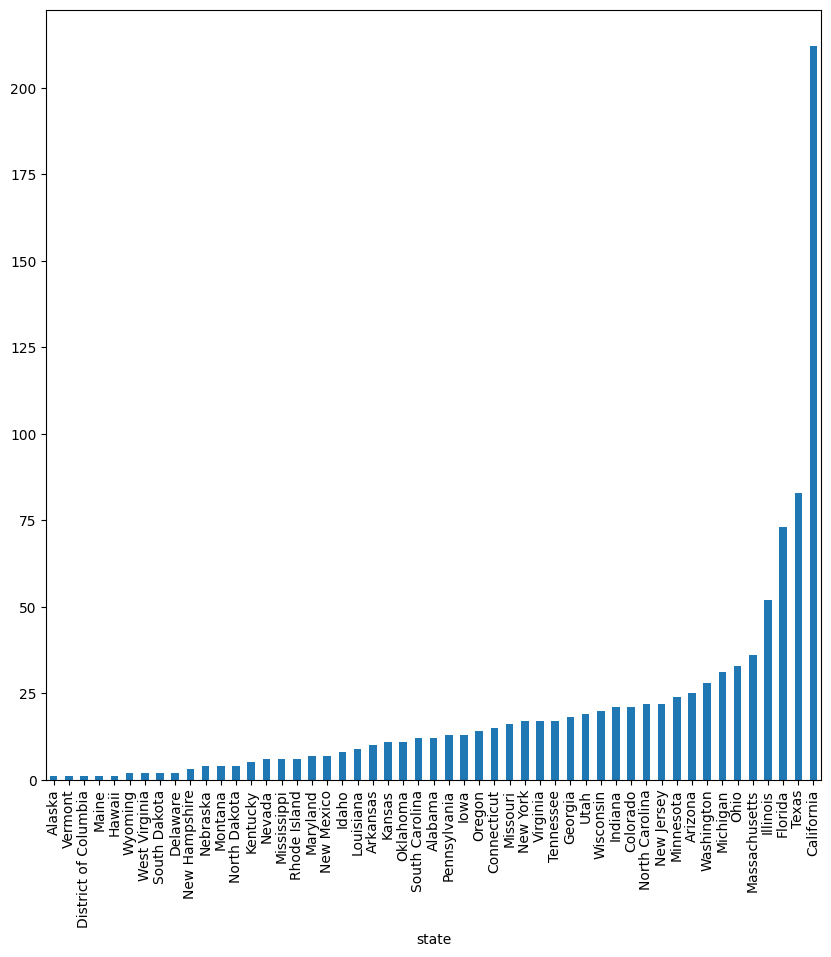

In [9]:
df.groupby(["state"]).city.count().sort_values().plot.bar(figsize=(10,10))

In [15]:
df.loc[df['state']=='Pennsylvania',['city','growth_from_2000_to_2013']]

,city,growth_from_2000_to_2013
4,Philadelphia,2.6%
61,Pittsburgh,-8.3%
223,Allentown,11.2%
289,Erie,-2.8%
352,Reading,8.0%
437,Scranton,0.0%
443,Bethlehem,5.2%
604,Lancaster,4.5%
758,Harrisburg,0.6%
811,Altoona,-7.3%


<Axes: xlabel='city'>

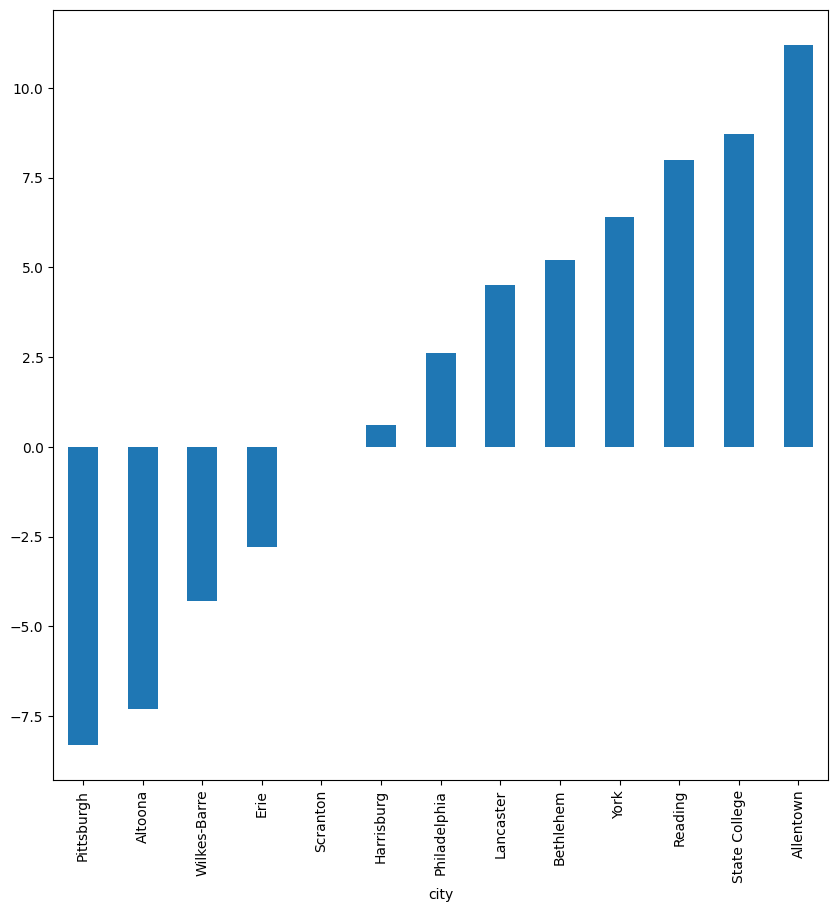

In [16]:
df.loc[df['state']=='Pennsylvania', ['city','growth_from_2000_to_2013']]\
.set_index('city')['growth_from_2000_to_2013'].str.replace('%', '').astype(np.float16).sort_values().plot.bar(figsize=(10, 10))

<Axes: ylabel='population'>

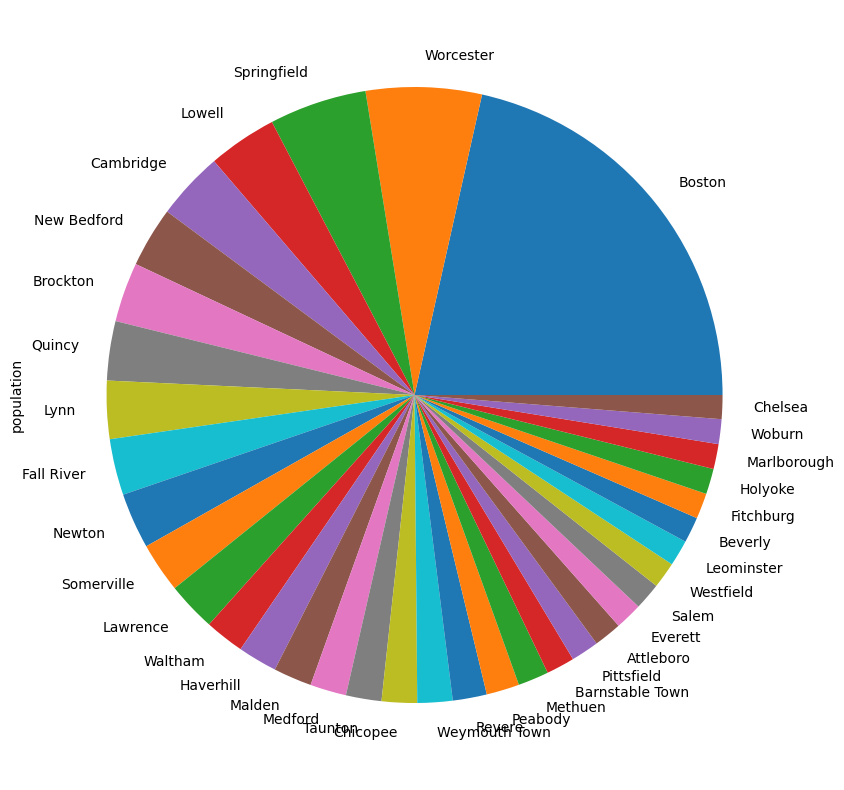

In [25]:
df.loc[df['state']=='Massachusetts', ['city','population']]\
.set_index('city')['population'].plot.pie(figsize=(15, 10))

<Axes: xlabel='longitude', ylabel='latitude'>

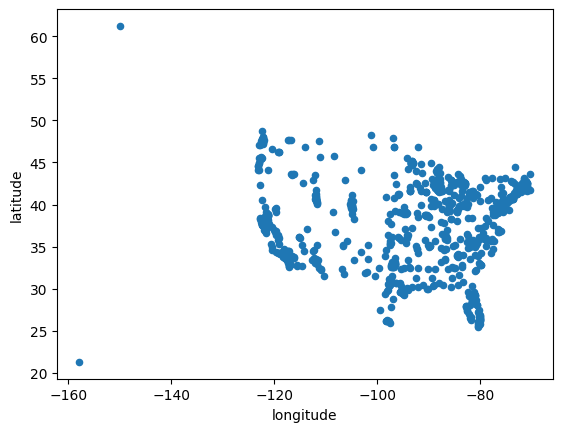

In [26]:
df.plot.scatter(x='longitude',y='latitude')

<Axes: >

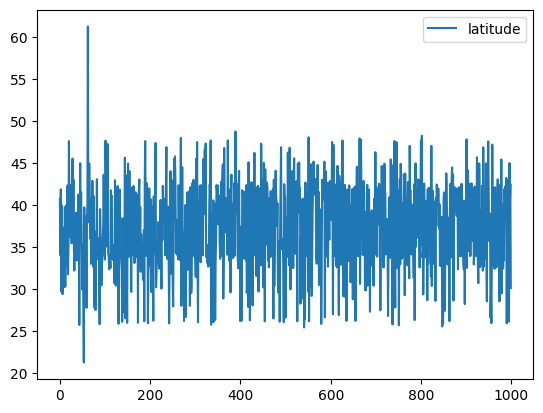

In [29]:
df.loc[ : , ['latitude']].plot()

<Axes: >

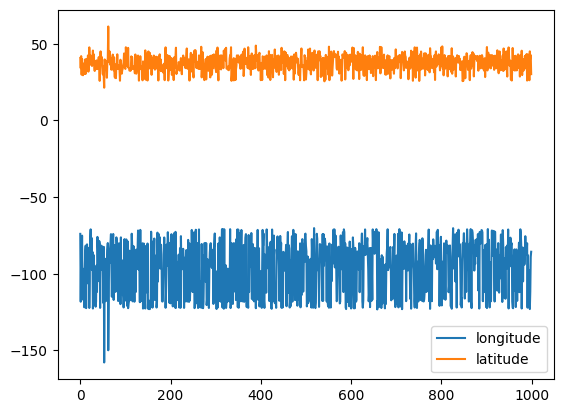

In [31]:
df.loc[ : , ['longitude','latitude']].plot()

In [34]:
##EXercice -2
filename='C:/Users/2376234/Desktop/data/chicago,il.csv'
df1=pd.read_csv(filename, usecols=[0,1,2], header=0,names=['date_time','mintemp','maxtemp'],parse_dates=['date_time'],index_col='date_time')
df1


,mintemp,maxtemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2
...,...,...
2019-03-11 09:00:00,3,-2
2019-03-11 12:00:00,3,-2
2019-03-11 15:00:00,3,-2


<Axes: >

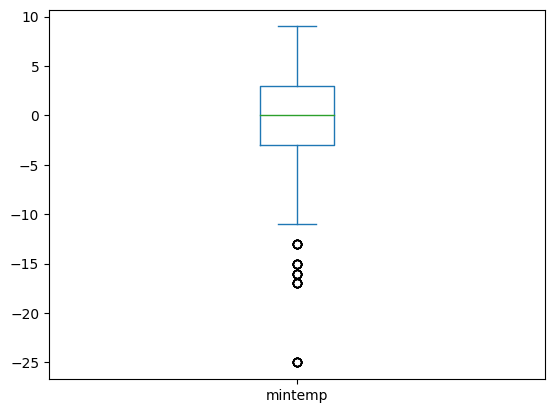

In [36]:
df1['mintemp'].plot.box()

In [37]:
df1['mintemp'].median()

0.0

<Axes: >

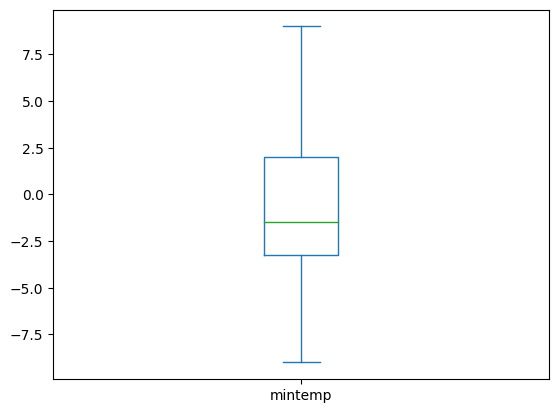

In [39]:
df1.loc['01-Feb-2019':'28-Feb-2019','mintemp'].plot.box()

<Axes: >

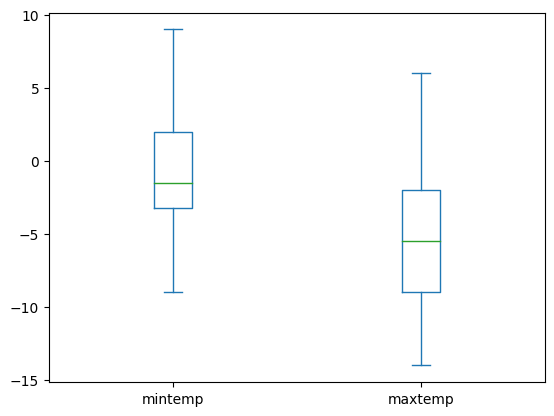

In [42]:
df1.loc['01-Feb-2019':'28-Feb-2019',['mintemp','maxtemp']].plot.box()

In [65]:
filenames = ['C:/Users/2376234/Desktop/data/nyc_taxi_2020-01.csv', 'C:/Users/2376234/Desktop/data/nyc_taxi_2020-07.csv']
all_dfs = []
for one_filename in filenames:
    print(one_filename)
    all_dfs.append(pd.read_csv(one_filename, usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge','total_amount','congestion_surcharge'],
     parse_dates = ['tpep_pickup_datetime']))     
    



C:/Users/2376234/Desktop/data/nyc_taxi_2020-01.csv
C:/Users/2376234/Desktop/data/nyc_taxi_2020-07.csv


In [67]:
df=pd.concat(all_dfs)
df 

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,1.0,1.20,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,1.0,1.20,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,1.0,0.60,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,1.0,0.80,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,1.0,0.00,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,79.95,0.0,0.5,2.75,0.0,0.3,83.50,0.0
800408,2020-07-19 13:02:00,NaN,4.40,16.23,0.0,0.5,2.75,0.0,0.3,19.78,0.0
800409,2020-07-19 13:32:00,NaN,8.78,34.90,0.0,0.5,2.75,0.0,0.3,38.45,0.0
800410,2020-07-19 13:28:00,NaN,6.50,18.75,0.0,0.5,7.72,0.0,0.3,29.77,2.5


In [68]:
df['year']= df['tpep_pickup_datetime'].dt.year
df['month']=df['tpep_pickup_datetime'].dt.month
df['day']=df['tpep_pickup_datetime'].dt.day


In [69]:
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day
0,2020-01-01 00:28:15,1.0,1.20,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020,1,1
1,2020-01-01 00:35:39,1.0,1.20,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020,1,1
2,2020-01-01 00:47:41,1.0,0.60,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020,1,1
3,2020-01-01 00:55:23,1.0,0.80,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020,1,1
4,2020-01-01 00:01:58,1.0,0.00,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,79.95,0.0,0.5,2.75,0.0,0.3,83.50,0.0,2020,7,19
800408,2020-07-19 13:02:00,NaN,4.40,16.23,0.0,0.5,2.75,0.0,0.3,19.78,0.0,2020,7,19
800409,2020-07-19 13:32:00,NaN,8.78,34.90,0.0,0.5,2.75,0.0,0.3,38.45,0.0,2020,7,19
800410,2020-07-19 13:28:00,NaN,6.50,18.75,0.0,0.5,7.72,0.0,0.3,29.77,2.5,2020,7,19


In [74]:
df.index.is_unique

False

In [124]:
!pip  install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
import seaborn as sns


In [127]:

sns.relplot(x='trip_distance', y='total_amount', data=df)

ValueError: Could not interpret value `trip_distance` for parameter `x`